In [1]:
import pandas as pd
import os

In [2]:
os.chdir(r'S:\Coding\PyCharm Projects\BlueConch Reviews WebScraping')

In [3]:
df5 = pd.read_csv("BCT reviews.csv")

In [4]:
df5.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
emp_type_list = df5['emp type'].tolist()

In [6]:
type_list = [e_type.split(',')[0] for e_type in emp_type_list]
df5['emp type'] = type_list

In [7]:
emp_exp_list = []

for e_type in emp_type_list:
    try:
        emp_exp_list.append(e_type.split(',')[1])
    except:
        emp_exp_list.append(' more than 0 years')

In [8]:
emp_exp_list = [int(element.split(' ')[3]) for element in emp_exp_list]

In [9]:
df5['exp_years'] = emp_exp_list

In [10]:
df5['star'] = pd.to_numeric(df5['star'])

In [11]:
date_of_post = df5['designation'].tolist()
date_of_post = [str(date).split('-')[0][:-1] for date in date_of_post]
df5['date_of_post'] = date_of_post

desg = df5['designation'].tolist()
desig2 = []
for i in desg:
    try:
        a = str(i).split('-')[1]
        desig2.append(a)
    except:
        desig2.append(' Anonymous')
        
df5['designation'] = desig2

In [12]:
df5['date_of_post'] = pd.to_datetime(df5['date_of_post'])

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shoun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
sid.polarity_scores('I hated the movie')['compound']

-0.6369

In [15]:
def analyse(arg):
    if arg > 0.34:
        return 'positive'
    elif arg < -0.35:
        return 'negative'
    else:
        return 'neutral'

In [16]:
reviews = df5['review title'].tolist()
reviews_sentiment = [sid.polarity_scores(i)['compound'] for i in reviews]
reviews_sentiment = [analyse(sent) for sent in reviews_sentiment]

In [17]:
df5['review sentiment'] = reviews_sentiment

In [18]:
year = df5['date_of_post'].tolist()
year = [str(i) for i in year]
year = [i[:4] for i in year]
df5['year'] = year

In [19]:
df_positive = df5[df5['review sentiment']=='positive']
df_neutral = df5[df5['review sentiment']=='neutral']
df_negative = df5[df5['review sentiment']=='negative']


In [20]:
positive_years = dict(df_positive['year'].value_counts())
years = list(range(2012,2022))
years = [str(year) for year in years]
review_years = [key for (key,value) in positive_years.items()]
review_years
missing_years = []
for item in years:
    if item not in review_years:
        missing_years.append(item)

for year in missing_years:
    positive_years.update({year:0})
    
neutral_years = dict(df_neutral['year'].value_counts())
years = list(range(2012,2022))
years = [str(year) for year in years]
review_years = [key for (key,value) in neutral_years.items()]
review_years
missing_years = []
for item in years:
    if item not in review_years:
        missing_years.append(item)

for year in missing_years:
    neutral_years.update({year:0})
    
negative_years = dict(df_negative['year'].value_counts())
years = list(range(2012,2022))
years = [str(year) for year in years]
review_years = [key for (key,value) in negative_years.items()]
review_years
missing_years = []
for item in years:
    if item not in review_years:
        missing_years.append(item)

for year in missing_years:
    negative_years.update({year:0})

In [21]:
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

In [46]:
positive_years = {int(key):value for (key,value) in positive_years.items()}
neutral_years = {int(key):value for (key,value) in neutral_years.items()}
negative_years = {int(key):value for (key,value) in negative_years.items()}

import collections
positive_dict = dict(collections.OrderedDict(sorted(positive_years.items())))
neutral_dict = dict(collections.OrderedDict(sorted(neutral_years.items())))
negative_dict = dict(collections.OrderedDict(sorted(negative_years.items())))

pos_x = [key for (key,value) in positive_dict.items()]
pos_y = [value for (key,value) in positive_dict.items()]
neu_x = [key for (key,value) in neutral_dict.items()]
neu_y = [value for (key,value) in neutral_dict.items()]
neg_x = [key for (key,value) in negative_dict.items()]
neg_y = [value for (key,value) in negative_dict.items()]

trace1 = go.Bar(x = pos_x, y = pos_y, name = 'positive', text = pos_y, textposition='outside')
trace2 = go.Bar(x = neu_x, y = neu_y, name = 'neutral', text = neu_y, textposition='outside')
trace3 = go.Bar(x = neg_x, y = neg_y, name = 'negative', text = neg_y, textposition='outside')

data = [trace1, trace2, trace3]

layout = go.Layout(title='Review Sentiments Year on Year', 
                   titlefont= dict(family='Arial', size=35),
                   barmode='group')

fig = go.Figure(data = data, layout=layout)

offline.iplot(fig)

In [26]:
star_rating = dict(df5['star'].value_counts())
star_rating = dict(collections.OrderedDict(sorted(star_rating.items())))
star_rating

{1: 16, 2: 15, 3: 46, 4: 92, 5: 61}

In [27]:
label = [int(key) for key,value in star_rating.items()]
values = [int(value) for key,value in star_rating.items()]
label = [str(i)+' star' for i in label]
label

['1 star', '2 star', '3 star', '4 star', '5 star']

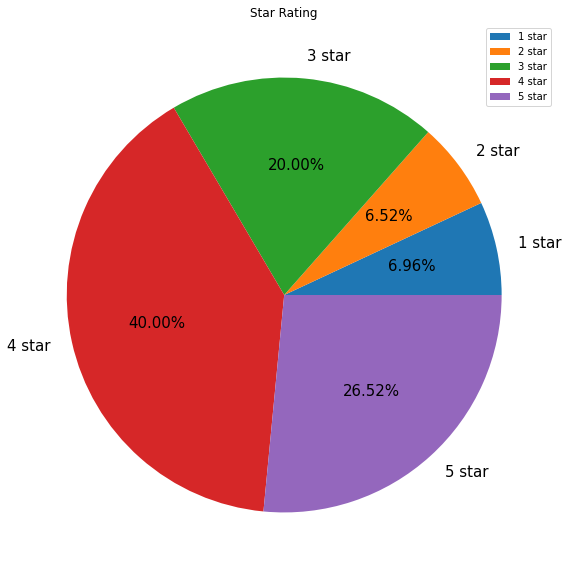

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
y = np.array(values)
mylabels = label

plt.pie(y, labels = mylabels, autopct = "%0.2f%%", textprops ={"fontsize":15})

plt.legend()
plt.title("Star Rating")
plt.savefig('pie.png')
plt.show()

In [42]:
current_emp_df = df5[df5['emp type'] == 'Current Employee']
current_emp_df.head(2)
current_review = dict(current_emp_df['review sentiment'].value_counts())
cur_x = [key for key,value in current_review.items()]
cur_y = [value for key,value in current_review.items()]

former_emp_df = df5[df5['emp type'] == 'Former Employee']
former_emp_df.head(2)
former_review = dict(former_emp_df['review sentiment'].value_counts())
for_x = [key for key,value in former_review.items()]
for_y = [value for key,value in former_review.items()]

(['positive', 'neutral', 'negative'], [34, 30, 9])

In [47]:
trace1 = go.Bar(x = cur_x, y = cur_y, name = 'current employees', text = cur_y, textposition='outside')
trace2 = go.Bar(x = for_x, y = for_y, name = 'former employees', text = for_y, textposition='outside')


data = [trace1, trace2]

layout = go.Layout(title='Review Sentiments for Current and Former',
                   xaxis_title="Sentiment Type",
                   yaxis_title="Count",
                   titlefont= dict(family='Arial', size=35),
                   barmode='group')

fig = go.Figure(data = data, layout=layout)
offline.iplot(fig)

In [53]:
current_emp_df = df5[df5['emp type'] == 'Current Employee']
current_emp_df.head(2)
current_star = dict(current_emp_df['star'].value_counts())
cur_x = [key for key,value in current_star.items()]
cur_y = [value for key,value in current_star.items()]


former_emp_df = df5[df5['emp type'] == 'Former Employee']
former_emp_df.head(2)
former_star = dict(former_emp_df['star'].value_counts())
for_x = [key for key,value in former_star.items()]
for_y = [value for key,value in former_star.items()]

trace1 = go.Bar(x = cur_x, y = cur_y, name = 'current employees', text = cur_y, textposition='outside')
trace2 = go.Bar(x = for_x, y = for_y, name = 'former employees', text = for_y, textposition='outside')


data = [trace1, trace2]

layout = go.Layout(title='Star Rating for Current and Former',
                   xaxis_title="Star Rating",
                   yaxis_title="Count",
                   titlefont= dict(family='Arial', size=35),
                   barmode='group')

fig = go.Figure(data = data, layout=layout)
offline.iplot(fig)

# Scatter Plot

In [66]:
scatter_df = df5[['exp_years','emp type','star','review sentiment']].copy()

In [70]:
emptype =scatter_df['emp type'].tolist()

In [71]:
emptype[0]

'Current Employee'

In [72]:
for n, i in enumerate(emptype):
    if i == 'Current Employee':
        emptype[n] = 20
    else:
        emptype[n] = 10

In [74]:
scatter_df['emp_type_size'] = emptype

In [67]:
starlist = scatter_df['star'].tolist() 
starlist = [int(i) for i in starlist]
scatter_df['star'] = starlist



In [83]:
import plotly.express as px
df = scatter_df
fig = px.scatter(df, x="exp_years", y="star", color="review sentiment",
                 size='emp_type_size')

fig.show()

# Finding Keywords & Clustering (For Pros and Cons)

In [91]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

# Create Stemmer Instance
stemmer = PorterStemmer()

pros_list = df5['pros'].tolist()
cons_list = df5['cons'].tolist()

sw = stopwords.words('english')

def tokenizer(word):
    return [stemmer.stem(w) for w in word.split(' ')]

tfidf = TfidfVectorizer(tokenizer=tokenizer,stop_words=sw)

pros_array = tfidf.fit_transform(pros_list).toarray()
pros_df = pd.DataFrame(pros_array, index=pros_list, columns=tfidf.get_feature_names())

c = cluster.KMeans()

pros_cluster = c.fit_predict(pros_df)
pro_check = set(pros_cluster)
len(pro_check)

cons_array = tfidf.fit_transform(cons_list).toarray()
cons_df = pd.DataFrame(cons_array, index=cons_list, columns=tfidf.get_feature_names())

c = cluster.AffinityPropagation()

cons_cluster = c.fit_predict(cons_df)
con_check = set(cons_cluster)
len(con_check)

# N Grams Model of Generating Words

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
pros_list = df5['pros'].tolist()
cons_list = df5['cons'].tolist()

In [160]:
ngram_vec = CountVectorizer(ngram_range=(3,4))

In [ ]:
transform_vector = ngram_vec.fit_transform(pros_list)

In [147]:
# Pros List
word_count = transform_vector.toarray().sum(axis=0)

word_count

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [149]:
vocab = ngram_vec.vocabulary_

In [150]:
vocab.items()

dict_items([('flexible work', 2167), ('work hours', 6942), ('hours cooperative', 3048), ('cooperative environment', 1432), ('environment appreciate', 1842), ('appreciate work', 546), ('flexible work hours', 2170), ('work hours cooperative', 6943), ('hours cooperative environment', 3049), ('cooperative environment appreciate', 1433), ('environment appreciate work', 1843), ('work life', 6952), ('life balance', 3708), ('balance canteen', 838), ('canteen facility', 1118), ('facility lots', 2083), ('lots of', 3830), ('of fun', 4301), ('fun activities', 2386), ('activities conducted', 57), ('conducted by', 1401), ('by hr', 1066), ('hr team', 3074), ('work life balance', 6953), ('life balance canteen', 3712), ('balance canteen facility', 839), ('canteen facility lots', 1119), ('facility lots of', 2084), ('lots of fun', 3832), ('of fun activities', 4302), ('fun activities conducted', 2388), ('activities conducted by', 58), ('conducted by hr', 1402), ('by hr team', 1067), ('balance is', 855), (

In [152]:
sorted_word_list = sorted([(word_count[i],ngram) for ngram,i in vocab.items()], reverse = True)

In [153]:
sorted_word_list

[(40, 'life balance'),
 (39, 'work life balance'),
 (39, 'work life'),
 (35, 'to work'),
 (33, 'good work'),
 (20, 'to learn'),
 (19, 'work culture'),
 (17, 'very good'),
 (16, 'work environment'),
 (14, 'lot of'),
 (14, 'if you'),
 (13, 'good work culture'),
 (12, 'opportunities to'),
 (12, 'is good'),
 (12, 'good work life'),
 (11, 'you can'),
 (11, 'place to'),
 (10, 'you are'),
 (10, 'work with'),
 (10, 'the company'),
 (10, 'of the'),
 (10, 'learning opportunities'),
 (10, 'is very'),
 (10, 'good company'),
 (9, 'you get'),
 (9, 'to work with'),
 (9, 'management is'),
 (9, 'good culture'),
 (9, 'environment and'),
 (8, 'work on'),
 (8, 'lots of'),
 (8, 'learn new'),
 (8, 'in the'),
 (8, 'good place'),
 (8, 'good people'),
 (8, 'good pay'),
 (8, 'company to'),
 (8, 'as well'),
 (7, 'to work on'),
 (7, 'to grow'),
 (7, 'place to work'),
 (7, 'opportunity to'),
 (7, 'of opportunities'),
 (7, 'new technology'),
 (7, 'new technologies'),
 (7, 'good learning'),
 (7, 'flexible work'),
 (

In [161]:
# Pros List
from sklearn.feature_extraction.text import CountVectorizer
transform_vector = ngram_vec.fit_transform(pros_list)
word_count = transform_vector.toarray().sum(axis=0)
vocab = ngram_vec.vocabulary_
sorted_word_list = sorted([(word_count[i],ngram) for ngram,i in vocab.items()], reverse = True)
sorted_word_list

[(39, 'work life balance'),
 (13, 'good work culture'),
 (12, 'good work life balance'),
 (12, 'good work life'),
 (9, 'to work with'),
 (7, 'to work on'),
 (7, 'place to work'),
 (7, 'company to work'),
 (6, 'work culture is'),
 (6, 'to learn new'),
 (6, 'opportunities to learn'),
 (6, 'good work environment'),
 (5, 'one of the'),
 (5, 'of opportunities to'),
 (5, 'if you are'),
 (5, 'good place to'),
 (5, 'as well as'),
 (4, 'you will get'),
 (4, 'work life balance is'),
 (4, 'work from home'),
 (4, 'work environment and'),
 (4, 'very good work culture'),
 (4, 'very good work'),
 (4, 'to learn and'),
 (4, 'lot of opportunities to'),
 (4, 'lot of opportunities'),
 (4, 'life balance is'),
 (4, 'is very good'),
 (4, 'great place to'),
 (4, 'good place to work'),
 (4, 'good learning opportunities'),
 (4, 'good company to work'),
 (4, 'good company to'),
 (4, 'company to work with'),
 (3, 'xpanxion is great'),
 (3, 'working with xpanxion from'),
 (3, 'working with xpanxion'),
 (3, 'work l

In [162]:
# Cons List
transform_vector = ngram_vec.fit_transform(cons_list)
word_count = transform_vector.toarray().sum(axis=0)
vocab = ngram_vec.vocabulary_
sorted_word_list = sorted([(word_count[i],ngram) for ngram,i in vocab.items()], reverse = True)
sorted_word_list

[(8, 'work life balance'),
 (8, 'no cons as'),
 (5, 'no cons as such'),
 (5, 'if you are'),
 (5, 'cons as such'),
 (5, 'can think of'),
 (4, 'there are no'),
 (4, 'onsite opportunities are'),
 (4, 'no work life balance'),
 (4, 'no work life'),
 (4, 'most of the'),
 (4, 'is not that'),
 (4, 'as of now'),
 (3, 'you have to'),
 (3, 'us wait for'),
 (3, 'that can think of'),
 (3, 'that can think'),
 (3, 'nothing as such'),
 (3, 'none that can think'),
 (3, 'none that can'),
 (3, 'no 401k match'),
 (3, 'in terms of'),
 (3, 'even if you'),
 (3, 'can be improved'),
 (3, 'at client side'),
 (3, 'at client location'),
 (3, 'as it is'),
 (2, 'you need to'),
 (2, 'you ll have to'),
 (2, 'you ll have'),
 (2, 'you have to be'),
 (2, 'xpanxion is not'),
 (2, 'working at client location'),
 (2, 'working at client'),
 (2, 'work life balance in'),
 (2, 'work from home'),
 (2, 'wait for year'),
 (2, 'use some work'),
 (2, 'us wait for year'),
 (2, 'training on people management'),
 (2, 'training on peop

In [163]:
df5.to_csv('processed.csv')